<a href="https://colab.research.google.com/github/waghpallavi/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Mobile Price Range Prediction



**Project Type**- Classification

**Contribution**- Team

**Team Name**- Insider

**Team Member 1**- Chetan Prakash

**Team Member 2**- Pallavi Wagh

**Team Member 3**- Kaushik Dey

# **Project Summary -**

The goal of the mobile price range prediction project is to create reliable prediction models that use machine learning techniques to estimate the price range of mobile devices based on their features and specifications. Data collection, preprocessing, model training and assessment, hyperparameter tuning, and model selection are all part of this process. The project's ultimate purpose is to provide significant insights and forecasts that can assist in educated pricing and marketing decisions in the competitive mobile device industry.

Important data about mobile devices, such as brand, model, display size, camera specs, CPU, storage, RAM, battery capacity, user reviews, and other pertinent information, is gathered to begin the project. This data is then preprocessed to handle missing values, feature engineering, as well as data normalization.

Using the preprocessed data, several machine learning methods, such as logistic regression, decision trees, random forests, K-nearest neighbors (KNN), and support vector machines (SVM), are then trained and evaluated. Accuracy, F1 score, precision, recall, and cross-validation are among the evaluation measures used for these models.

Hyperparameter tuning approaches may also be used to improve model performance by determining the best values for hyperparameters such as learning rate, regularisation strength, maximum tree depth, number of neighbors in KNN, and kernel type in SVM.

Based on the evaluation findings, the best-performing model(s) are chosen, which may then be used to produce price range forecasts for new mobile devices based on their features and characteristics. These forecasts can help companies with price strategy, sales forecasting, market segmentation, competitive analysis, and customer relationship management.

The project concludes with a summary of the findings, including the accuracy and performance of the chosen model(s), as well as recommendations for leveraging the prediction results for business goals. When evaluating the performance of the models, it is critical to examine more than simply accuracy.

Overall, the mobile price range prediction project uses machine learning approaches to deliver significant insights and forecasts for informed decision-making in the competitive mobile device business.

# **GitHub Link -**

Chetan Prakash - https://github.com/Chetan1207/ML-Classification-Mobile-Price-Range-Prediction.git

Pallavi Wagh -

Kaushik Dey -

# **Problem Statement**


The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone.

We will proceed with reading the data, and then perform data analysis. The practice of examining data using analytical or statistical methods in order to identify meaningful information is known as data analysis. After data analysis, we will find out the data distribution and data types. We will train 5 classification algorithms (Logistic Regression, Decision Tree Classifier, Random Forest Clasifier, K-Nearest Neighbors, and Support Vecotr Machine) to predict the output. We will also compare the outputs. Let us get started with the project implementation.

# **Define Your Business Objective?**
---

The project's main goal is to offer insightful analysis and forecasts that can help decision-makers in the mobile device sector make well-informed choices on pricing and marketing tactics. Businesses are able to make educated judgments on their pricing strategy, sales forecasting, market segmentation, competitive analysis, and customer relationship management by precisely projecting the price range of mobile devices based on their features and specifications. By doing this, firms may increase their income and profitability while maintaining market competitiveness. The project's ultimate goal is to provide mobile device sector companies with a competitive edge by utilizing machine learning techniques to make more precise and data-driven judgments.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from numpy import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
#  Mount Drive and import Dataset
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone project/Classification Mobile Price Range Prediction/data_mobile_price_range.csv'
df=pd.read_csv(file_path)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Dataset First View

In [4]:
# Dataset First Look
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
row_count = len(df)
row_count

2000

In [6]:
column_count = len(df.columns)
column_count

21

### Dataset Information

In [7]:
# Information regarding type of columns present in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

### What did you know about your dataset?

Data set having 2000 rows and 21 columns all are numerical. No null values or duplicate values is present in the dataset. Dataset is related to mobile features like 3g, 4g, ram, cores etc.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

### Variables Description 

*  **battery_power-** Battery Capacity in MAh
*  **blue**- Has Bluetooth or not
*  **clock_speed-** Speed at which microprocessor executes instructions
*  **dual_sim-** Has dual sim support or not
*  **fc-** Front camera magapixels
*  **four_g-** Has 4g or not
*  **int_memory-** Internal memory capacity
*  **m_dep-** mobile depth in cm
*  **mobile_wt-** Weight of mobile phone
*  **n_cores-** Number of cores in processor
*  **pc-** Primary camera magapixels
*  **px_height-** Pixels resolution height
*  **px_width-** Pixel resolution width
*  **ram-** Random Access Memory in MB
*  **sc_h-** Screen Height
*  **sc_w-** Screen Width
*  **talk_time-** Longest that a single battery can last over a call
*  **three_g-** Has 3g or not
*  **touch_screen-** phone have touchscreen or keypad
*  **wifi-** Has wifi or not
*  **price_range-** This is the **target variable** with a value of 0 (low cost), 1 (medium cost), 2 (high cost), and 3 (very high cost)

### Check Unique Values for each variable.

In [9]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  uni_value = df[i].nunique()
  print(f"No. of unique values in ",i,"is",uni_value,".")

No. of unique values in  battery_power is 1094 .
No. of unique values in  blue is 2 .
No. of unique values in  clock_speed is 26 .
No. of unique values in  dual_sim is 2 .
No. of unique values in  fc is 20 .
No. of unique values in  four_g is 2 .
No. of unique values in  int_memory is 63 .
No. of unique values in  m_dep is 10 .
No. of unique values in  mobile_wt is 121 .
No. of unique values in  n_cores is 8 .
No. of unique values in  pc is 21 .
No. of unique values in  px_height is 1137 .
No. of unique values in  px_width is 1109 .
No. of unique values in  ram is 1562 .
No. of unique values in  sc_h is 15 .
No. of unique values in  sc_w is 19 .
No. of unique values in  talk_time is 19 .
No. of unique values in  three_g is 2 .
No. of unique values in  touch_screen is 2 .
No. of unique values in  wifi is 2 .
No. of unique values in  price_range is 4 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [10]:
# Write your code to make your dataset analysis ready.
# We groupby battery and talktime:
phone_uses_time=df.groupby(['battery_power'])['talk_time'].max().reset_index()
phone_uses_time.sort_values('talk_time', ascending=False)
phone_uses_time.head(10)

,battery_power,talk_time
0,501,17
1,502,20
2,503,16
3,504,16
4,506,15
5,507,12
6,508,14
7,509,12
8,510,11
9,511,14


### What all manipulations have you done and insights you found?

This code categorizes the data in the df DataFrame by battery_power and calculates the maximum talk_time for each group. The result is then arranged in descending order of talk_time and the top ten rows are shown.

It organizes the data based on battery power and calculates the maximum talk time for each battery power value. The results suggest the top ten battery power and maximum talk times. A battery power of 502 mAh is related to the longest conversation duration of 20 hours. The insights of this research may be used to make judgments about mobile phone battery life, such as selecting a battery with a greater mAh rating for longer talk time.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

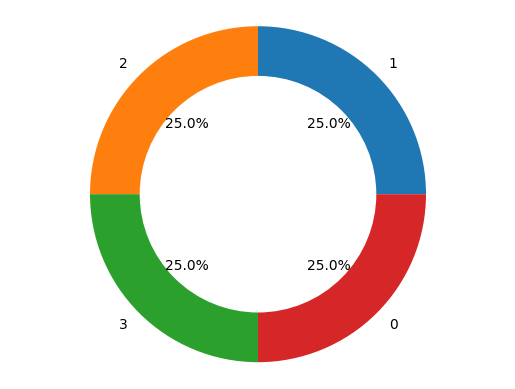

In [11]:
# Chart - 1 visualization code
# Create a pieplot
price_range_counts = df['price_range'].value_counts()
data = price_range_counts.values

# Create a pie chart
labels = price_range_counts.index
plt.pie(data, labels=labels, autopct='%1.1f%%') # autopct we use because of percentage shown
plt.axis('equal') 

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

##### 1. Why did you pick the specific chart?

A pie chart depicts the portion relationship of your data. The area covered in a circle with different colours makes it easy to see how the percentages compare.

##### 2. What is/are the insight(s) found from the chart?

All present equally that is 25 percent. so our target variable is equally distribute.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This chart's insights can assist in producing a strong business impact by providing information on the most important aspects for calculating the price range of mobile devices, as well as highlighting potential areas for differentiation and competitive advantage. There are no revelations that result in negative growth.

#### Chart - 2

In [21]:
# Chart - 2 visualization code
# Correlation between all the numerical data
correlation = df.corr()
df.corr()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

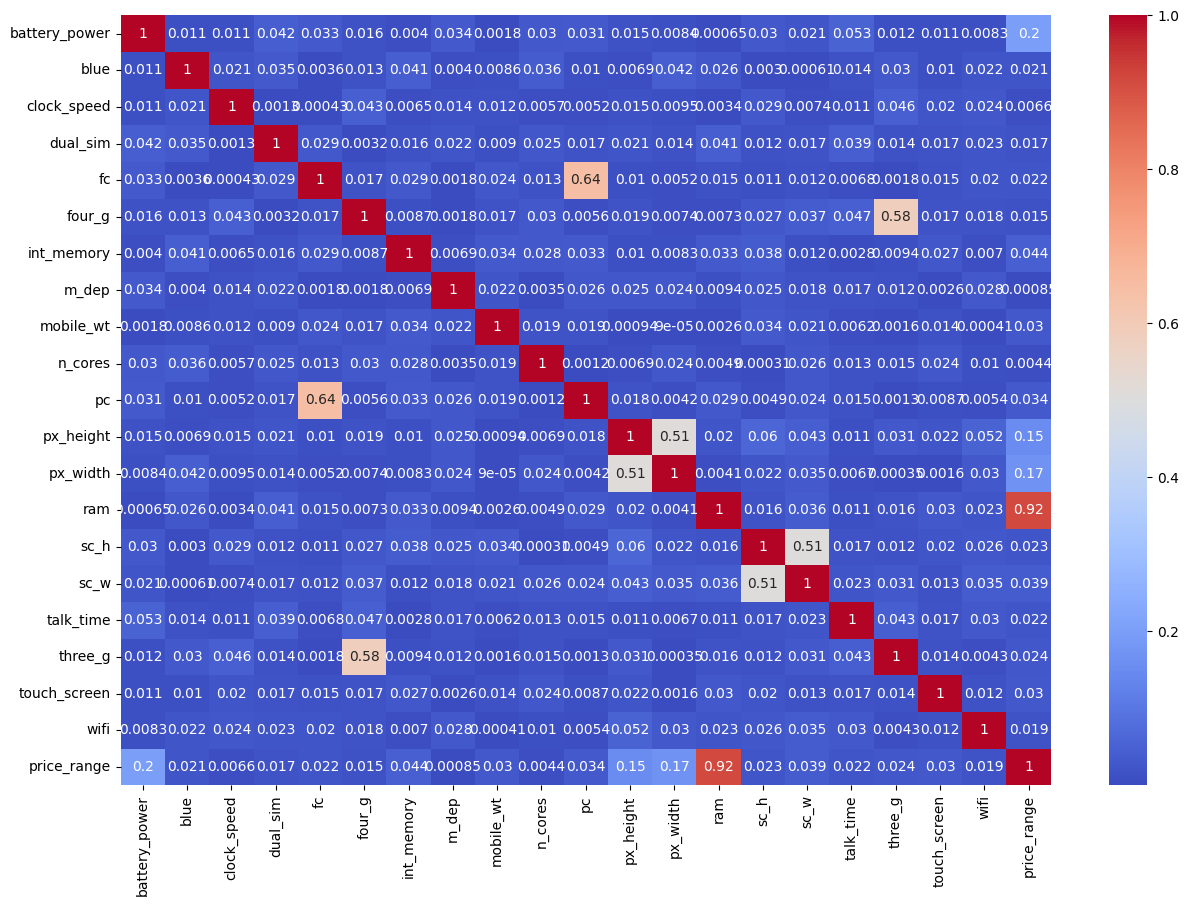

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(abs(correlation), annot=True,cmap="coolwarm")

##### 1. Why did you pick the specific chart?

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.A heat map is a quick visual overview of information. More detailed heat maps help the user in understanding complicated data sets.

##### 2. What is/are the insight(s) found from the chart?

1. The diagonal line is completely red because it represents the correlation of each feature with itself, which is always equal to 1.
2. The highest correlation is observed between the features 'ram' and 'price_range' with a correlation coefficient of 0.92, which indicates a moderate positive correlation between these two features.
3. There is also a moderate positive correlation between 'pc' and 'fc' features with a correlation coefficient of 0.64. 
4. The feature 'four_g' and 'three_g' have a moderate correlation with with a correlation coefficient of 0.58.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The correlation heatmap shows that the 'ram' and 'price_range' features have a strong positive correlation, which can be useful for pricing strategy. However, there are also some moderate positive correlations between features such as 'pc' and 'fc', and 'four_g' and 'three_g', which may lead to multicollinearity issues in modeling. Overall, the insights can be valuable for decision-making, but further analysis and modeling are needed to fully understand their impact

#### Chart - 3

<Axes: xlabel='price_range', ylabel='Density'>

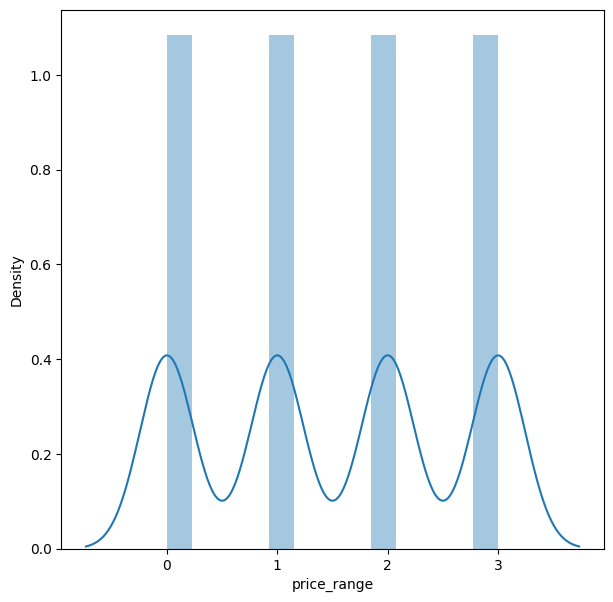

In [22]:
# Chart - 3 visualization code
# Draw density chart to check distribution of the Data and our Dependent variable is 'price range'
plt.figure(figsize=(7,7))
sns.distplot(df['price_range'])

##### 1. Why did you pick the specific chart?

Distribution plots evaluate the distribution of sample data graphically by comparing the actual distribution of the data to the theoretical values predicted provided a specific distribution

##### 2. What is/are the insight(s) found from the chart?

We see that there are equal distribution between all the data in target variable

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If it is not distributed evenly, it has a favorable influence on our model and business objectives, therefore we should convert it to log10 or square root.

#### Chart - 4

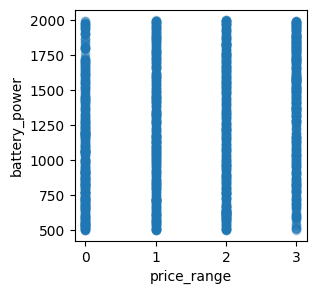

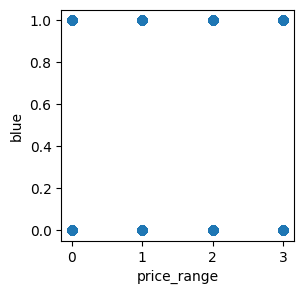

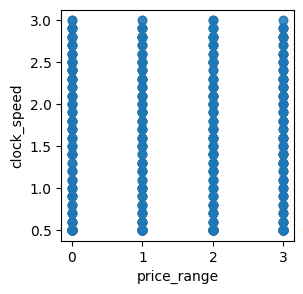

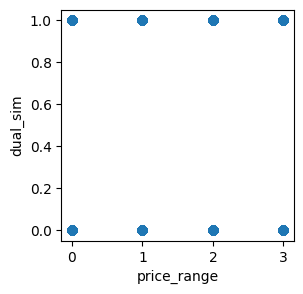

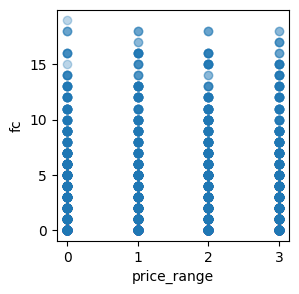

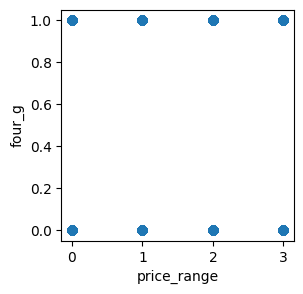

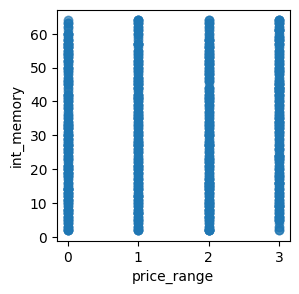

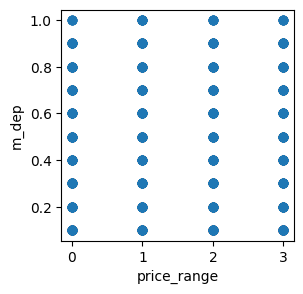

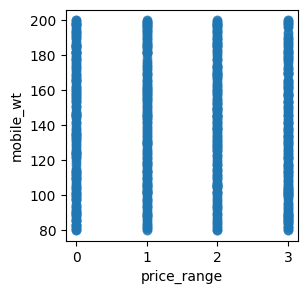

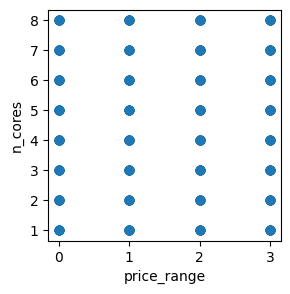

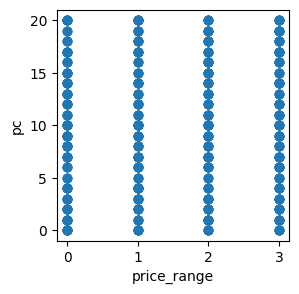

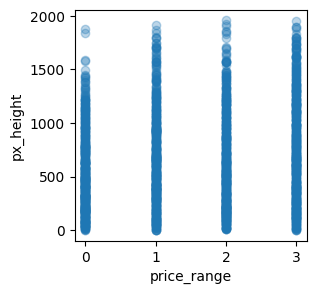

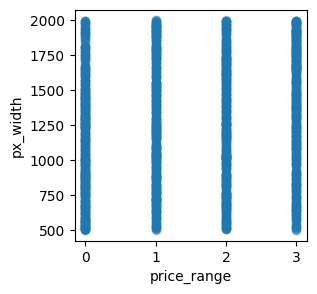

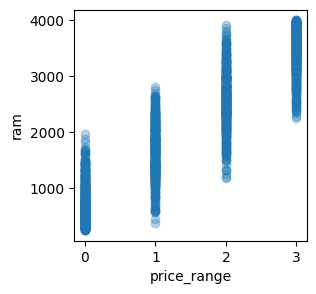

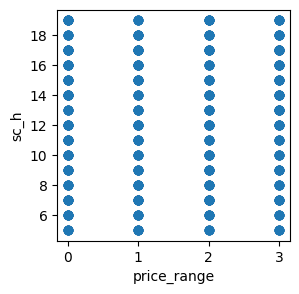

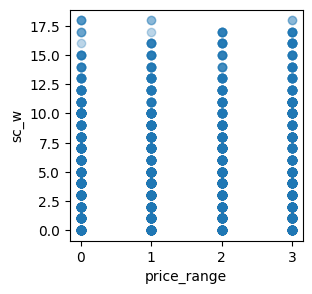

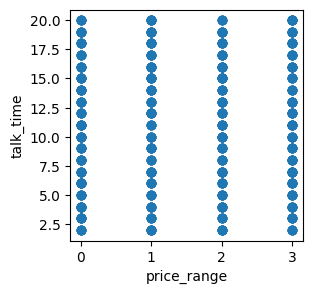

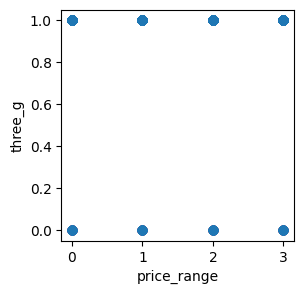

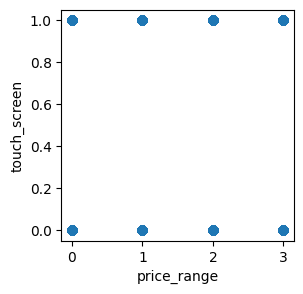

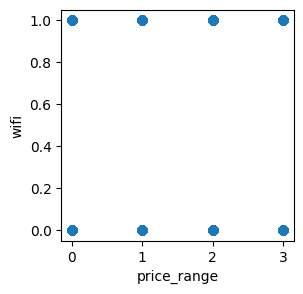

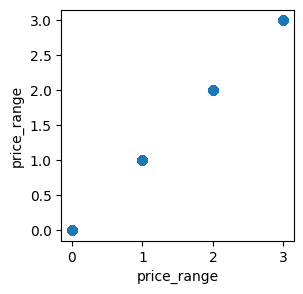

In [ ]:
# Chart - 4 visualization code
# Function to show the realtion between all the independent variable to dependent variable
def relation(independent_variable, other_variables, dataframe):
    for col in other_variables:
        fig = plt.figure(figsize=(3, 3))
        plt.scatter(dataframe[independent_variable], dataframe[col], alpha=0.3)
        plt.xlabel(independent_variable)
        plt.ylabel(col)
        plt.show()
other_variables = df.columns[:].tolist() # select columns 1-10 as other variables
independent_variable = 'price_range'

relation(independent_variable, other_variables, df)

##### 1. Why did you pick the specific chart?

The scatter plot's aim is to show what happens to one variable when another variable is modified. The scatter plot is used for testing a theory about the two variables of the test.

##### 2. What is/are the insight(s) found from the chart?



*   Battery is directly related to price range as we increase the power of battery price is also increases.
*   Bluetooth and price range have no connectivity.

*   Clock Speed is directly proportional to price range. Because to execute multiple operation at same time we need clock speed so how fastest is the mobile price is accordingly high.
*   Sim ports have no connection with price range.

*   Front Camera also we called is also dependent on price range. because camera lens is costly so as to increse the camera quality prices increases.
*   Mobile Network like 2g, 3g, and 4g have no connection with Price range.

*   Internal memory is also directly proportional to price range. because if we need more internal space more advanced chipset is required which is costly.
*   Mobile dimensions like Mobile depth, Mobile weight is also directly proportional to price. 

*   Cores id directly proportal to speed and speed is directly proportional to price so that cores is also directly proportional to price.
*   As like front camera back camera or primary camera its hight and width pixels are all relate the quality and quality need price.

*   Ram help to increase the speed and also dependent on price range.
*   Hight and Width of screen size is also comes in dimension it is also dependent on price.

*   Talktime is related to battery. How much the battery is good we will se good talktime and battery depends on cost.
*   touchscreen or keypad or wifi is not dependent on mobile. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Battery, clock speed, front camera, internal memory, screen size, and RAM insights are likely to have a positive impact on the business because they are favorably associated with the price range of mobile phones.

Bluetooth, SIM ports, mobile networks, talk time, touchscreen/keypad/wifi insights are unlikely to have significant effects on the business because they have no connection with the price range..